In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




sns.set()



#datasets=pd.read_csv("cancer.csv")
#print(datasets.head(10))
#print(datasets.columns)
#datasets.info()
#datasets[['Rates.Age.< 18','Rates.Age.> 64','Rates.Age.18-45','Rates.Age.45-64']].hist()


#datasets=pd.read_csv("../dataset.csv")
#print(datasets.info())
#print(datasets.head())

#sns.pairplot(datasets)

#plt.boxplot(datasets['Age'])
#plt.show()

#datasets['Age'].mean()
#datasets_nona=datasets.dropna()
#plt.boxplot(datasets['Age'])
#plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
Columns:  Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.0617

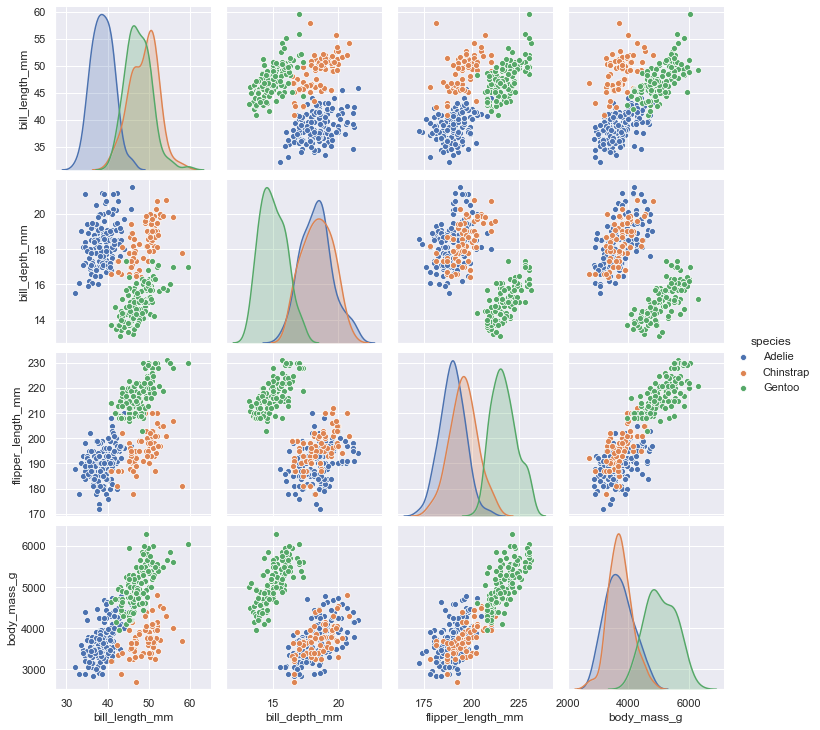

In [2]:
#df=sns.load_dataset("brain_networks")
#print(df.describe())

penguins=sns.load_dataset("penguins")

##Informazioni preliminari
##Vediamo com'è fatto il dataset
print(penguins.info())
print("Columns: ",penguins.columns)
print(penguins.describe())

#Pairplot

sns.pairplot(penguins,hue='species')


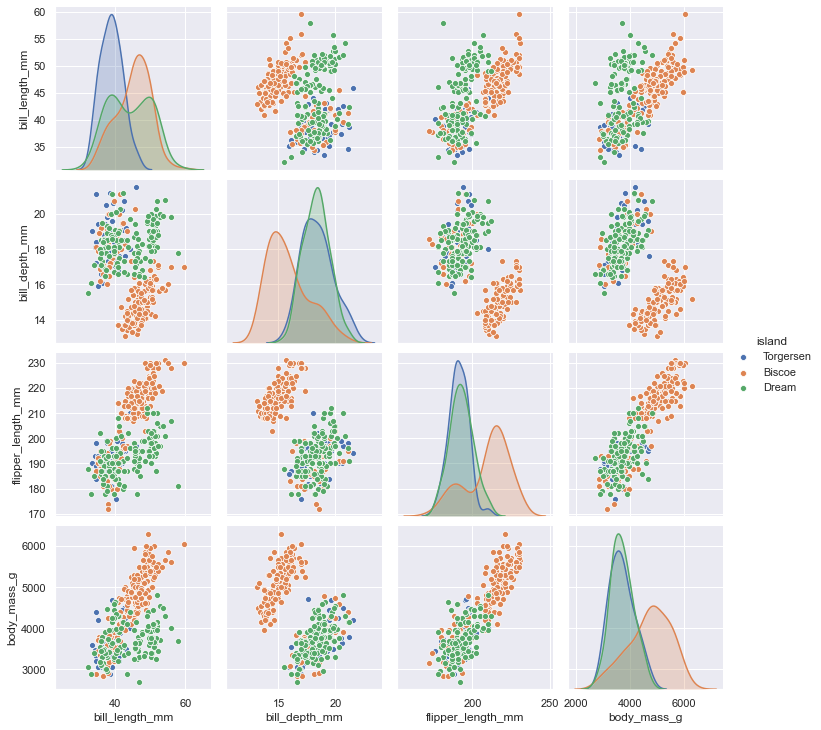

In [3]:
sns.pairplot(penguins,hue='island')


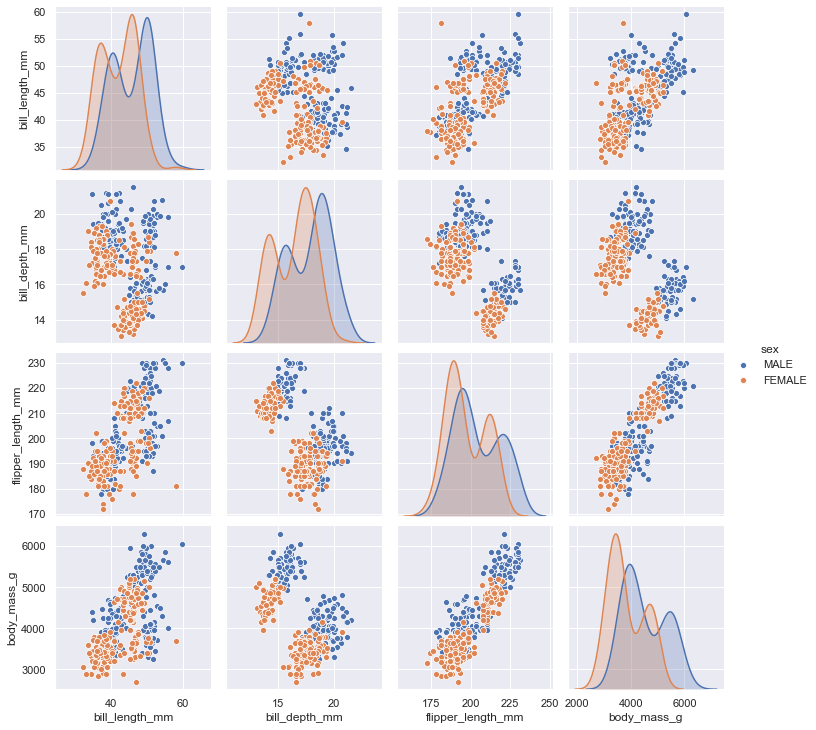

In [4]:

sns.pairplot(penguins,hue='sex')


##Predire la massa in fuzione delle altre 
##Predire il sesso in funzione delle altre

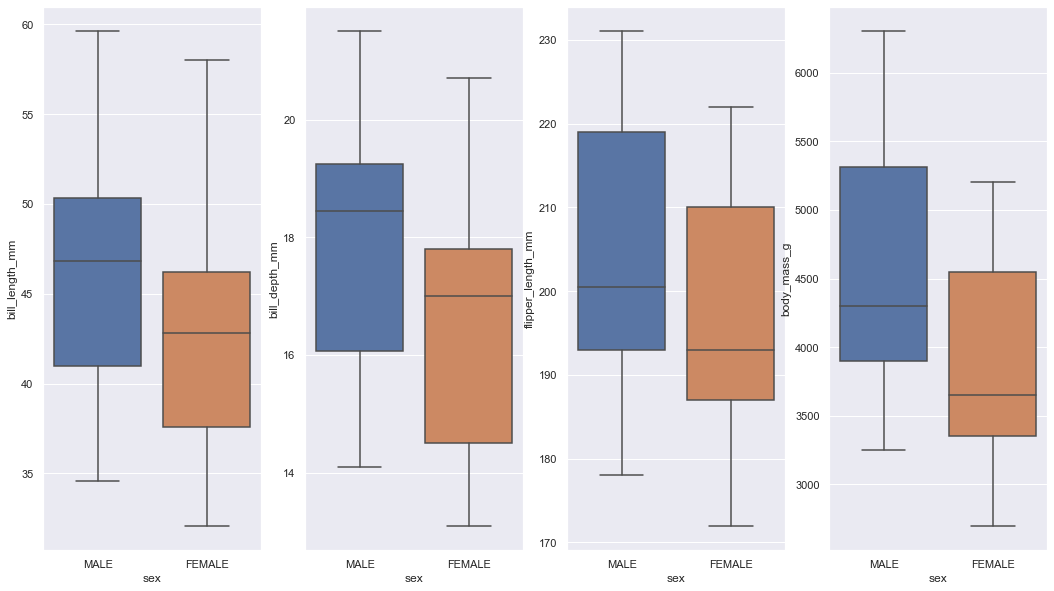

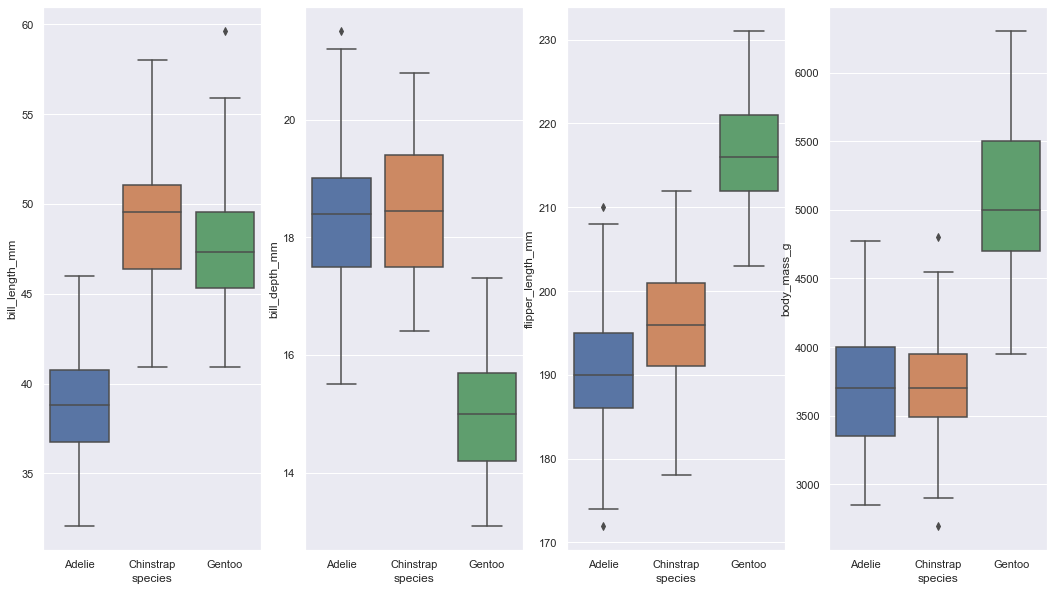

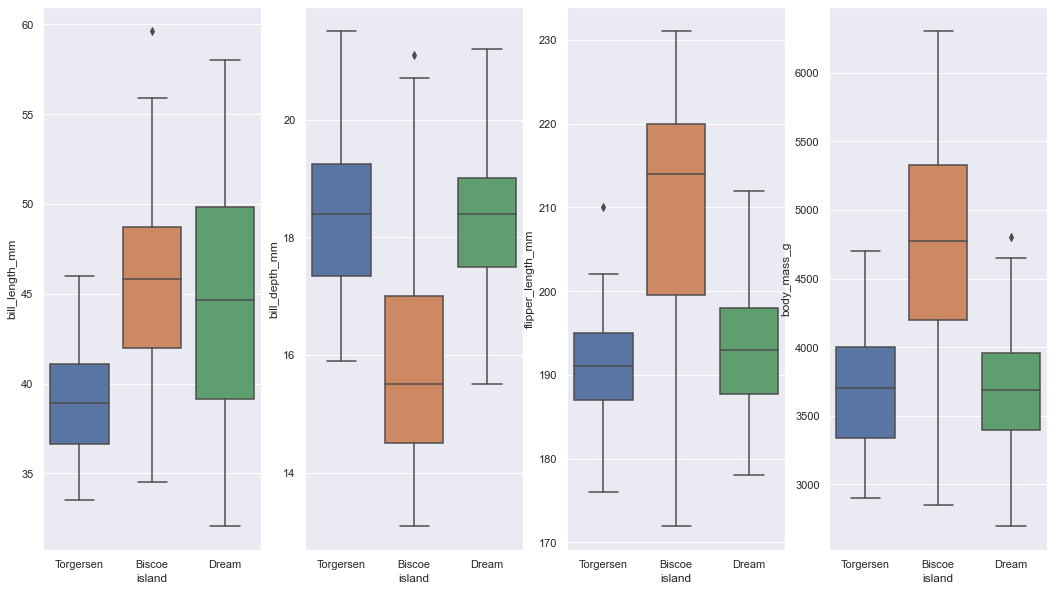

In [5]:
##boxplot specie in funzione delle altre
def boxplot_penguins(name):
    fig, axes = plt.subplots(1,4, figsize=(18, 10))
    x_list=[name]*4
    for col,ax_,elem in zip(penguins.columns[2:-1],axes,x_list):
        sns.boxplot(ax=ax_,x=penguins[elem],y=penguins[col])
    plt.show()

    
boxplot_penguins('sex')
boxplot_penguins('species')
boxplot_penguins('island')


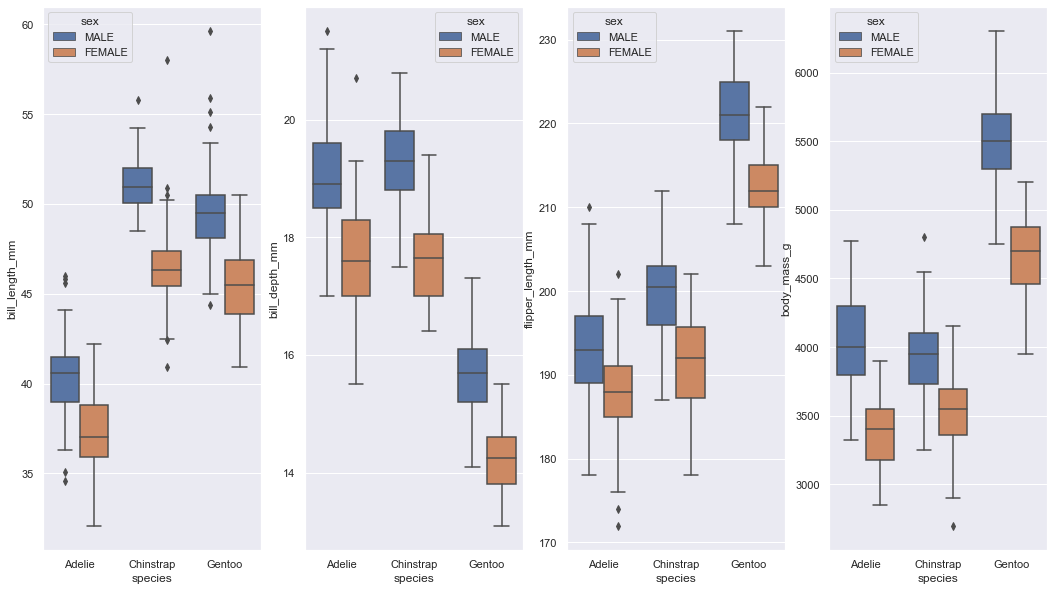

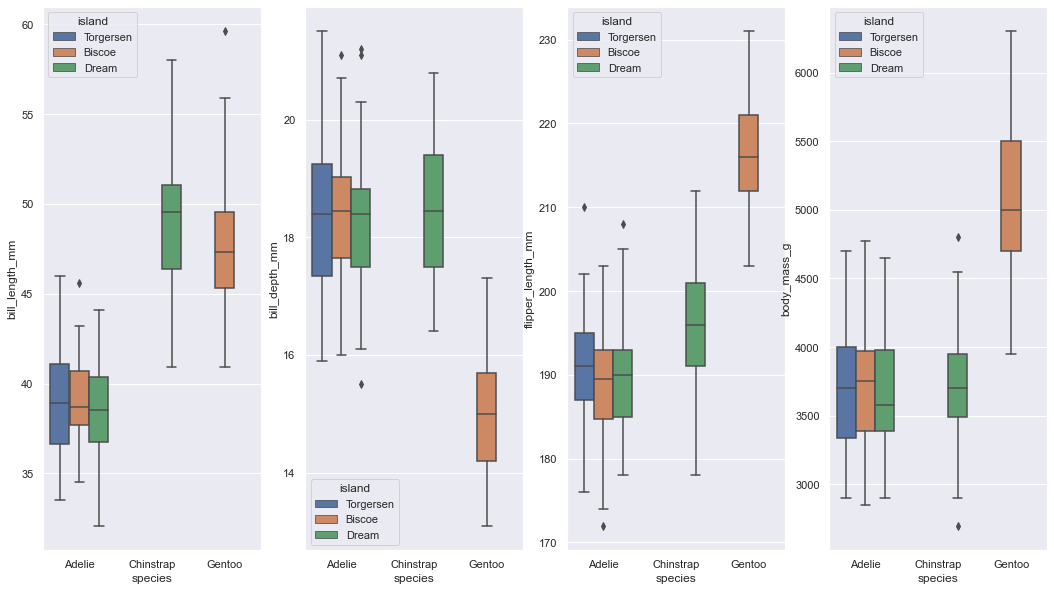

In [6]:
def boxplot_penguins_multiple(name,hue_):
    fig, axes = plt.subplots(1,4, figsize=(18, 10))
    x_list=[name]*4
    for col,ax_,elem in zip(penguins.columns[2:-1],axes,x_list):
        sns.boxplot(ax=ax_,x=penguins[elem],y=penguins[col],data=penguins,hue=hue_)
    plt.show()


boxplot_penguins_multiple('species','sex')
boxplot_penguins_multiple('species','island')


E:\Conda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Conda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


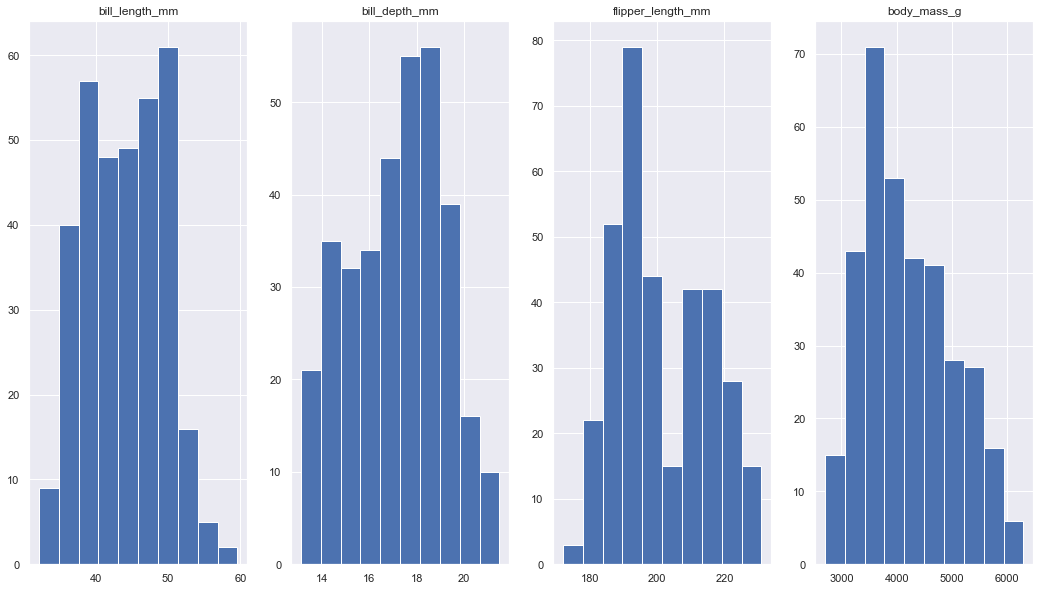

In [7]:
###ISTOGRAMMI

def histogram(df):
    
    fig, axes = plt.subplots(1,4, figsize=(18, 10))
    
    for col,ax_ in zip(df.columns[2:-1],axes):
        ax_.hist(df[col])
        ax_.set_title(col)
        
    plt.show()
    
    
histogram(penguins)

Species
Sex
Island


island
Biscoe       AxesSubplot(0.125,0.125;0.775x0.755)
Dream        AxesSubplot(0.125,0.125;0.775x0.755)
Torgersen    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

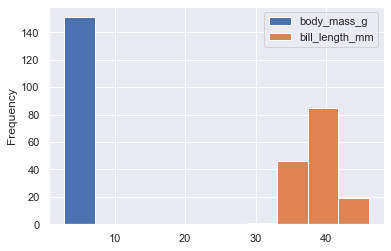

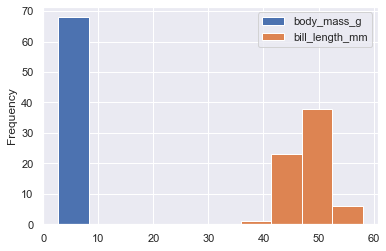

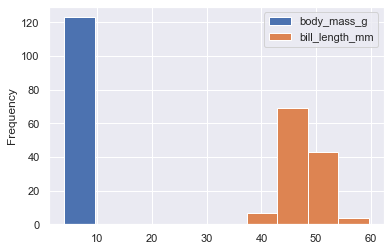

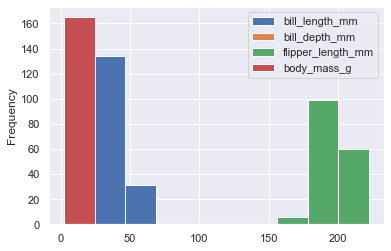

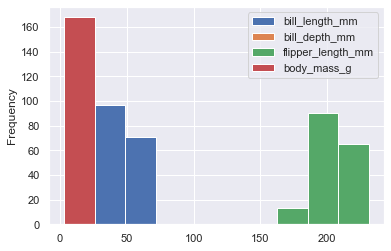

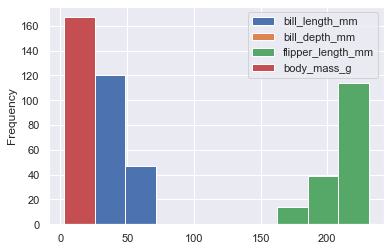

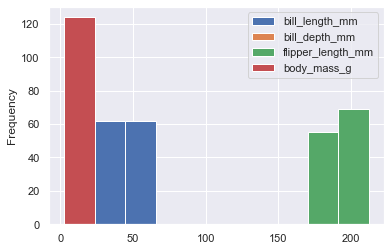

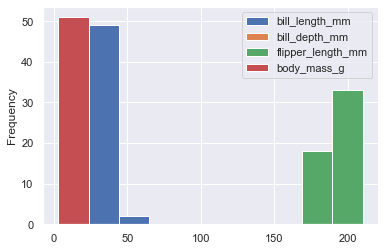

In [9]:
#del penguins['body_mass']
penguins['body_mass_g']=penguins['body_mass_g']/1000.0
print("Species")
penguins.groupby('species')[['body_mass_g','bill_length_mm']].plot.hist()
print("Sex")
penguins.groupby('sex').plot.hist()
print("Island")
penguins.groupby('island').plot.hist()


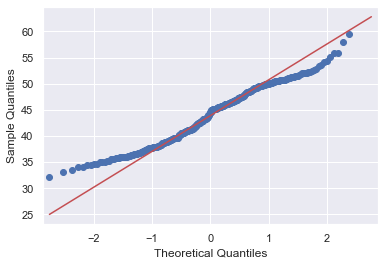

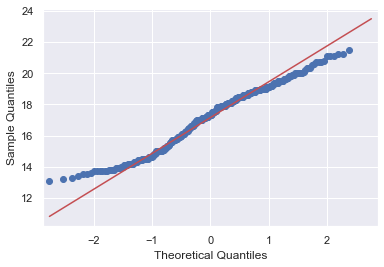

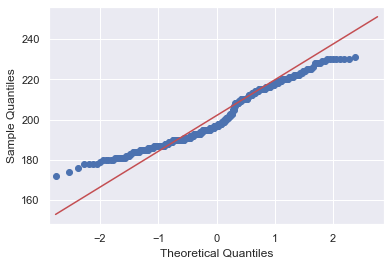

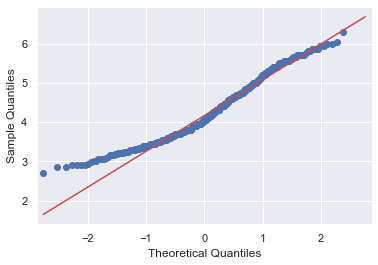

In [10]:
##### confrontiamo le distribuzioni ?? QQPLOT
### sembra che nessuna si distribuisca come una normale
import statsmodels.api as sm
from scipy import stats

sm.qqplot(penguins['bill_length_mm'],line='q')
sm.qqplot(penguins['bill_depth_mm'],line='q')
sm.qqplot(penguins['flipper_length_mm'],line='q')
sm.qqplot(penguins['body_mass_g'],line='q')

plt.show()


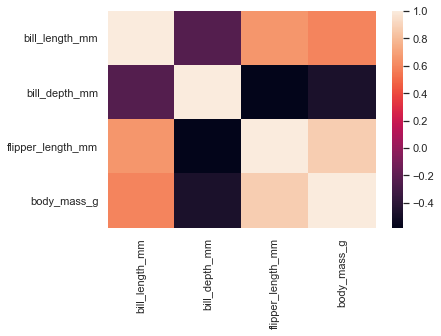

In [11]:
sns.heatmap(penguins.corr())

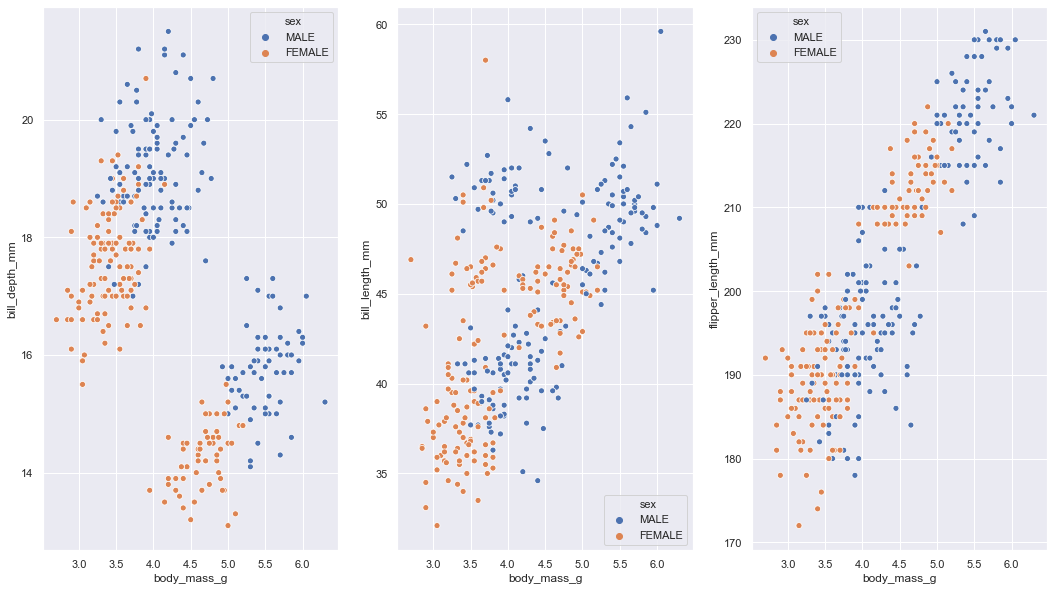

In [12]:
def scatterplot_df(df):
    
    fig,axes=plt.subplots(1,3,figsize=(18,10))
    
    
    sns.scatterplot(ax=axes[0],x=df['body_mass_g'],y=df['bill_depth_mm'],hue=df['sex'])
    sns.scatterplot(ax=axes[1],x=df['body_mass_g'],y=df['bill_length_mm'],hue=df['sex'])
    sns.scatterplot(ax=axes[2],x=df['body_mass_g'],y=df['flipper_length_mm'],hue=df['sex'])
    #sns.scatterplot(df['body_mass_g'],df['island'],hue=df['sex'])
    plt.show()
    

#sns.regplot(penguins['body_mass_g'],penguins['flipper_length_mm'])
scatterplot_df(penguins)
    
###PLOTTARLI TUTTI

In [13]:
penguins.cov()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2.605592
bill_depth_mm,-2.534234,3.899808,-16.212950,-0.747370
flipper_length_mm,50.375765,-16.212950,197.731792,9.824416
body_mass_g,2.605592,-0.747370,9.824416,0.643131


In [14]:
from scipy.stats import pearsonr 
from scipy.stats import spearmanr
from scipy.stats import kendalltau

penguins_not_nan=penguins.dropna()
print(penguins_not_nan.shape)


print(pearsonr(penguins_not_nan['bill_length_mm'],penguins_not_nan['body_mass_g']))
print(pearsonr(penguins_not_nan['bill_depth_mm'],penguins_not_nan['body_mass_g']))
print(pearsonr(penguins_not_nan['flipper_length_mm'],penguins_not_nan['body_mass_g']))
print(spearmanr(penguins_not_nan['bill_length_mm'],penguins_not_nan['body_mass_g']))
print(spearmanr(penguins_not_nan['bill_depth_mm'],penguins_not_nan['body_mass_g']))
print(spearmanr(penguins_not_nan['flipper_length_mm'],penguins_not_nan['body_mass_g']))
print(kendalltau(penguins_not_nan['bill_length_mm'],penguins_not_nan['body_mass_g']))
print(kendalltau(penguins_not_nan['bill_depth_mm'],penguins_not_nan['body_mass_g']))
print(kendalltau(penguins_not_nan['flipper_length_mm'],penguins_not_nan['body_mass_g']))



(333, 7)
(0.589451110176949, 1.5386135144860296e-32)
(-0.4720156601951394, 7.024160153242371e-20)
(0.8729788985653614, 3.132836250971883e-105)
SpearmanrResult(correlation=0.5764803898091901, pvalue=6.972018209835926e-31)
SpearmanrResult(correlation=-0.4292825749697777, pvalue=2.3072991429745475e-16)
SpearmanrResult(correlation=0.8403902050259514, pvalue=4.630423990534208e-90)
KendalltauResult(correlation=0.4277597595197072, pvalue=7.996822211304145e-31)
KendalltauResult(correlation=-0.1923719563058287, pvalue=2.373919488963624e-07)
KendalltauResult(correlation=0.6614597291126837, pvalue=5.651888599506073e-70)


In [16]:
##CLASSIFICAZIONE ??
##VOGLIAMO PREDIRE IL PESO A PARTIRE DALLE ALTRE FEATURESS

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


X=penguins_not_nan[['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','sex']]
X=pd.get_dummies(X,drop_first=True)
y=penguins_not_nan['body_mass_g']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)


model=LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, preds))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, preds))
print('MAD: %.2f'
      % mean_absolute_error(y_test, preds))



(249, 8) (84, 8) (84,) (249,)
Mean squared error: 0.06
Coefficient of determination: 0.91
MAD: 0.20


In [17]:
from statsmodels.formula.api import ols

penguins_2=pd.get_dummies(penguins_not_nan,drop_first=True)
#print(penguins_2.columns)
model = ols("body_mass_g ~ bill_length_mm+bill_depth_mm+sex_MALE+species_Gentoo+species_Chinstrap+flipper_length_mm",penguins_2).fit()

print(model.params)
print(model.summary())

preds=model.predict(X_test)
print(np.sum((preds-y_test)**2))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test*1000, preds*1000))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test*1000, preds*1000))
print('MAD: %.2f'
      % mean_absolute_error(y_test*1000, preds*1000))

print(X_test.iloc[5])
print(y_test.iloc[5]*1000)
print(model.predict(X_test.iloc[5])*1000)

Intercept           -1.460995
bill_length_mm       0.018204
bill_depth_mm        0.067218
sex_MALE             0.389892
species_Gentoo       1.014627
species_Chinstrap   -0.251477
flipper_length_mm    0.015950
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          6.82e-144
Time:                        18:02:42   Log-Likelihood:                -53.687
No. Observations:                 333   AIC:                             121.4
Df Residuals:                     326   BIC:                             148.0
Df Model:                           6                                         
Covariance Type:            nonrobust                           

In [ ]:
### CLASSIFICARE IL SESSO IN BASE ALLE ALTRE FEATURES

[9.15579462e-01 7.09569746e-02 1.08427537e-02 1.19942962e-03
 7.04376227e-04 3.21785765e-04 2.25044644e-04 1.25536363e-04
 4.46373223e-05]
[1.42604669e+07 5.54728781e+03 2.70749234e+03 7.87856826e+01
 1.82811744e+01 4.85576487e+00 2.50284379e-01]
(333, 2)
211.66114060327016
(333, 2)


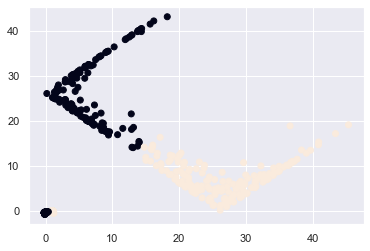

In [88]:
### PCA??
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

model_pca=PCA()
penguins_transform=model_pca.fit_transform(penguins_2)

#print(np.cumsum(model_pca.explained_variance_))
#plt.scatter(range(len(model_pca.explained_variance_ratio_)),model_pca.explained_variance_ratio_)
print(model_pca.explained_variance_ratio_)
print(model.eigenvals)
model_pca_2d=PCA(n_components=2)
penguins_2d=model_pca_2d.fit_transform(penguins_2)
print(penguins_2d.shape)
#print(model_pca_2d.eigenvals)
#print(penguins_2d[:,0].mean())
print(penguins_2d[:,0].var())

#plt.scatter(penguins_2d[:,0],penguins_2d[:,1])
x_new=model_pca_2d.transform([[10,5,2,3,5,4,2,4,2]])
#plt.scatter(x_new[:,0],x_new[:,1])

kmeans=KMeans(n_clusters=2)
x_kmeans=kmeans.fit_transform(penguins_2d)
print(x_kmeans.shape)
plt.scatter(x_kmeans[:,0],x_kmeans[:,1],c=kmeans.labels_)
#print(np.unique(kmeans.labels_))


x_retrasf=model_pca_2d.inverse_transform(x_kmeans)
#print(x_retrasf.shape)
#print(x_retrasf[:,2],x_retrasf[:,3],kmeans.labels_)
plt.scatter(x_retrasf[:,5],x_retrasf[:,7],c=kmeans.labels_)

In [ ]:
##PREDIRE L'isola?

In [ ]:
##predire bill_length_mm in base alle altre

In [ ]:
###predire la specie?